In [3]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import sys,os
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("../data/yfinance_data/AAPL_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  10998


In [4]:
# Calculate Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the DataFrame with indicators
print(df.tail())

             Date        Open        High         Low       Close   Adj Close  \
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

         Volume  Dividends  Stock Splits      SMA_20      SMA_50        RSI  \
10993  61777600        0.0           0.0  224.228500  208.474199  48.687742   
10994  51391200        0.0           0.0  224.440500  209.098399  47.386437   
10995  41601300        0.0           0.0  224.633500  209.709000  48.055700   
10996  36311800        0.0           0.0  225.014500  210.279400  48.476184   
10997  41643800        0.0           0.0  225.117001  210.858600  49.359115   

           MACD  MACD_Signal  MACD_His

In [6]:
import numpy as np

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate annualized volatility (standard deviation of returns)
volatility = np.std(df['Daily_Return'].dropna()) * np.sqrt(252)

print(f"Daily Returns:\n{df['Daily_Return'].head()}")
print(f"Annualized Volatility: {volatility:.4f}")


Daily Returns:
0         NaN
1   -0.052171
2   -0.073398
3    0.024751
4    0.028992
Name: Daily_Return, dtype: float64
Annualized Volatility: 0.4428


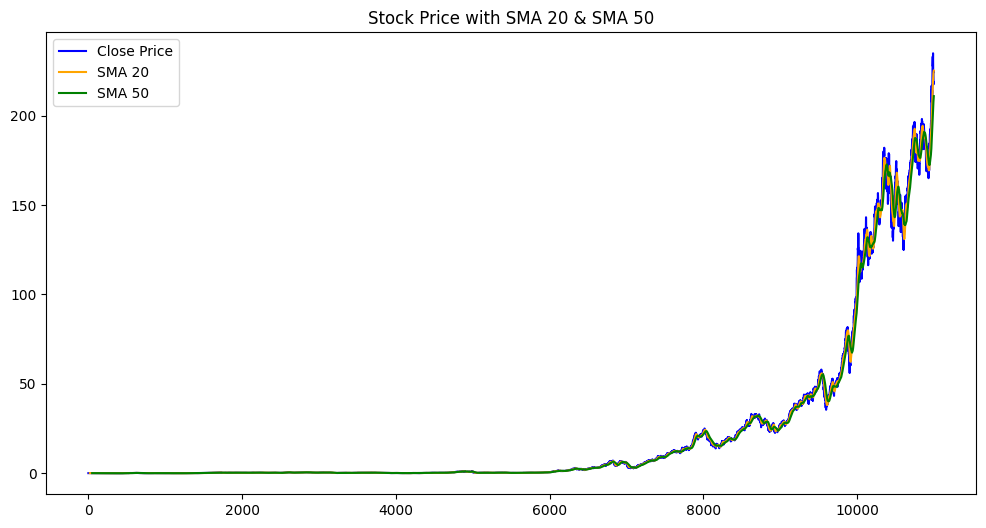

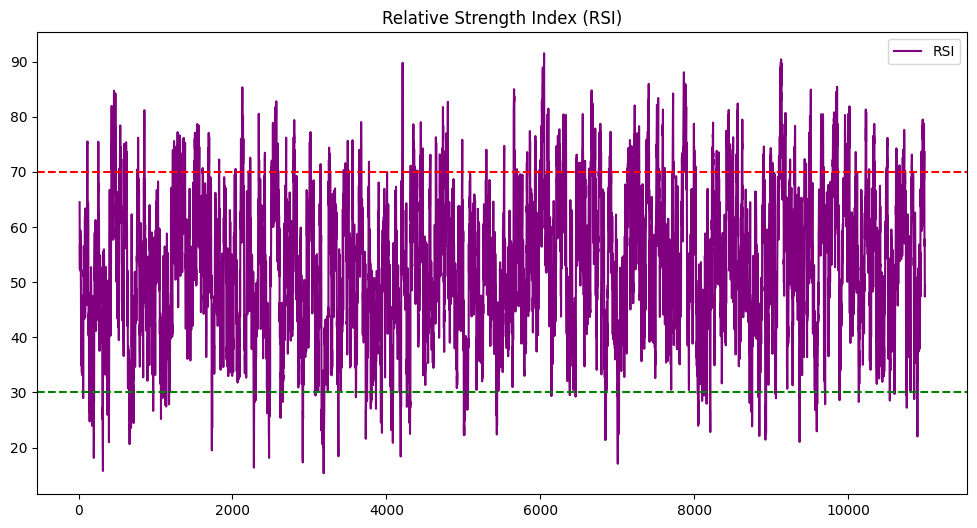

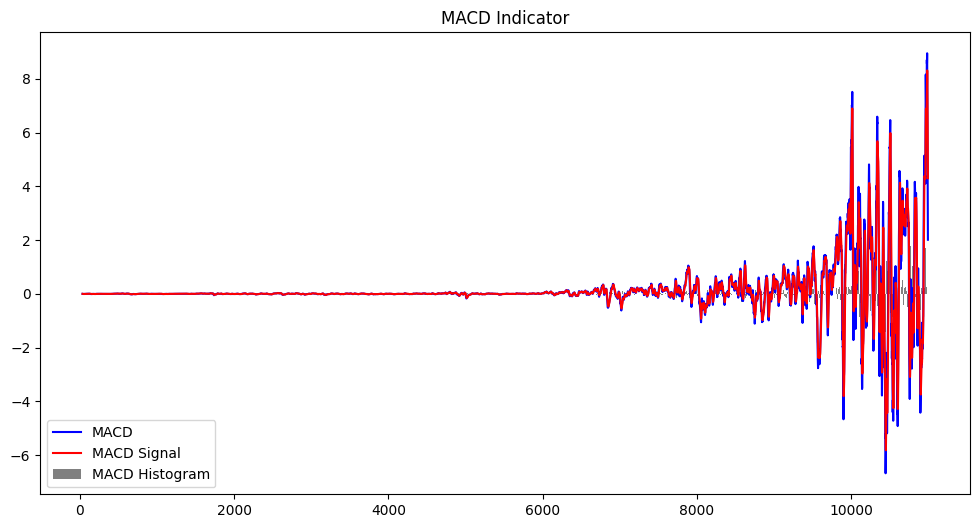

In [7]:
# Plot Stock Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='SMA 20', color='orange')
plt.plot(df['SMA_50'], label='SMA 50', color='green')
plt.title("Stock Price with SMA 20 & SMA 50")
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')  # Overbought level
plt.axhline(30, linestyle='--', color='green')  # Oversold level
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
